# **Clustering Data Email**

# **Load Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
file_path = '/content/drive/MyDrive/PPW/UTS/spam.csv'

In [3]:
import pandas as pd
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [4]:
# Baca file CSV
data = pd.read_csv(file_path, encoding='latin1')
data.head()

,id,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,1,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,2,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,3,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,4,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,5,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# Ambil hanya kolom yang diperlukan
datanew = data[['id', 'Text']]
datanew

,id,Text
0,1,"Go until jurong point, crazy.. Available only ..."
1,2,Ok lar... Joking wif u oni...
2,3,Free entry in 2 a wkly comp to win FA Cup fina...
3,4,U dun say so early hor... U c already then say...
4,5,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,5568,This is the 2nd time we have tried 2 contact u...
5568,5569,Will Ì_ b going to esplanade fr home?
5569,5570,"Pity, * was in mood for that. So...any other s..."
5570,5571,The guy did some bitching but I acted like i'd...


In [ ]:
print("Jumlah data:", len(datanew))

Jumlah data: 5572


## **Preprocessing**

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_and_stem(text):
    text = str(text).lower()                       # ubah ke huruf kecil
    text = re.sub(r'[^a-z\s]', '', text)           # hapus karakter non-huruf
    words = nltk.word_tokenize(text)               # tokenisasi
    words = [stemmer.stem(w) for w in words if w not in stop_words]  # stemming + hapus stopwords
    return ' '.join(words)

datanew['clean_text'] = datanew['Text'].apply(clean_and_stem)
datanew.head()

/tmp/ipython-input-2589953224.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew['clean_text'] = datanew['Text'].apply(clean_and_stem)


,id,Text,clean_text
0,1,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,2,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,3,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,4,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,5,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


## **TF-IDF dan K-means =3**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(datanew['clean_text'])

# KMeans (contoh: 3 cluster)
kmeans = KMeans(n_clusters=3, random_state=42)
datanew['cluster'] = kmeans.fit_predict(X)


/tmp/ipython-input-1420405379.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew['cluster'] = kmeans.fit_predict(X)


### **Hasil**

In [ ]:
for i in range(3):
    print(f"\n=== Cluster {i} ===")
    print(datanew[datanew['cluster'] == i]['Text'].head(5).to_string(index=False))



=== Cluster 0 ===
FreeMsg Hey there darling it's been 3 week's no...
Even my brother is not like to speak with me. T...
Ahhh. Work. I vaguely remember that! What does ...
Yeah he got in at 2 and was v apologetic. n had...
Great! I hope you like your man well endowed. I...

=== Cluster 1 ===
I'm back &amp; we're packing the car now, I'll ...
   Oops, I'll let you know when my roommate's done
Do you know what Mallika Sherawat did yesterday...
  Ha ha ha good joke. Girls are situation seekers.
        Does not operate after  &lt;#&gt;  or what

=== Cluster 2 ===
Go until jurong point, crazy.. Available only i...
                     Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final...
 U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives arou...


### **Visualisasi Hasil Clustering (PCA 2D)**

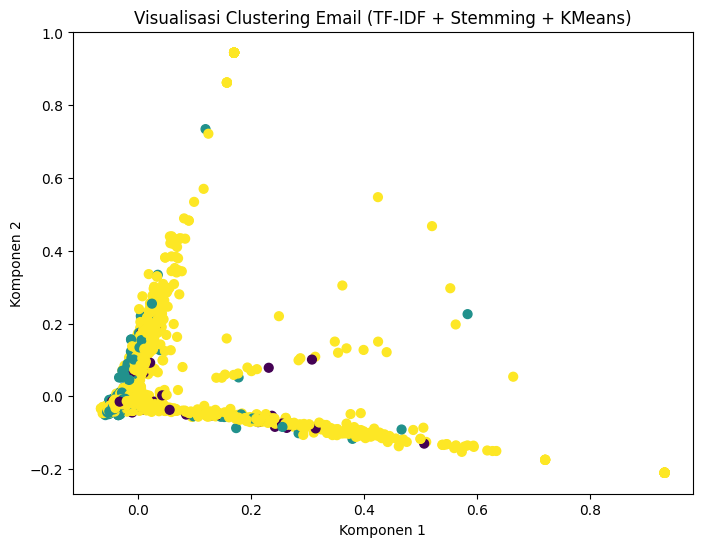

In [ ]:
pca = PCA(n_components=2, random_state=42)
reduced_X = pca.fit_transform(X.toarray())

plt.figure(figsize=(8,6))
plt.scatter(reduced_X[:,0], reduced_X[:,1], c=datanew['cluster'], cmap='viridis', s=40)
plt.title('Visualisasi Clustering Email (TF-IDF + Stemming + KMeans)')
plt.xlabel('Komponen 1')
plt.ylabel('Komponen 2')
plt.show()

## **TF-IDF dan K-means =10**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(datanew['clean_text'])

# KMeans (contoh: 10 cluster)
kmeans = KMeans(n_clusters=10, random_state=42)
datanew['cluster'] = kmeans.fit_predict(X)


/tmp/ipython-input-1822394370.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew['cluster'] = kmeans.fit_predict(X)


### **Hasil**

In [ ]:
for i in range(10):
    print(f"\n=== Cluster {i} ===")
    print(datanew[datanew['cluster'] == i]['Text'].head(5).to_string(index=False))



=== Cluster 0 ===
FreeMsg Hey there darling it's been 3 week's no...
Even my brother is not like to speak with me. T...
Ahhh. Work. I vaguely remember that! What does ...
Yeah he got in at 2 and was v apologetic. n had...
Great! I hope you like your man well endowed. I...

=== Cluster 1 ===
A gram usually runs like  &lt;#&gt; , a half ei...
        Does not operate after  &lt;#&gt;  or what
                              Good stuff, will do.
Turns out my friends are staying for the whole ...
          Found it, ENC  &lt;#&gt; , where you at?

=== Cluster 2 ===
Go until jurong point, crazy.. Available only i...
 U dun say so early hor... U c already then say...
As per your request 'Melle Melle (Oru Minnaminu...
WINNER!! As a valued network customer you have ...
SIX chances to win CASH! From 100 to 20,000 pou...

=== Cluster 3 ===
I'm gonna be home soon and i don't want to talk...
 IÛ÷m going to try for 2 months ha ha only joking
Just forced myself to eat a slice. I'm really n...
I'm ba

### **Visualisasi Hasil Clustering (PCA 2D)**

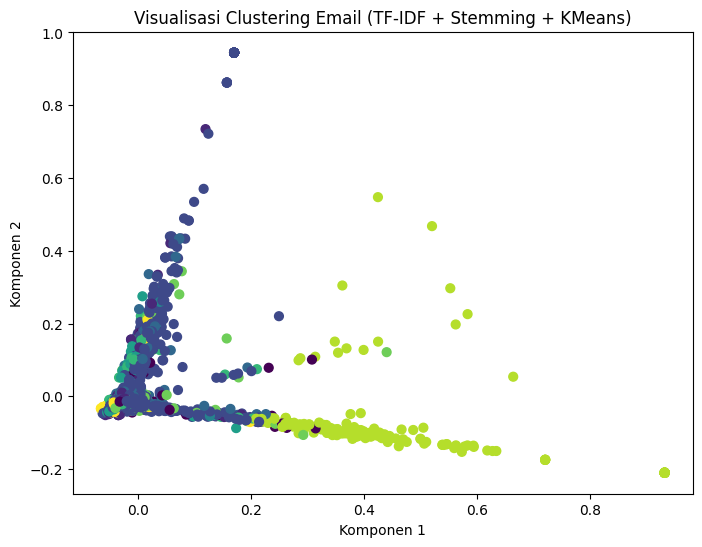

In [ ]:
pca = PCA(n_components=2, random_state=42)
reduced_X = pca.fit_transform(X.toarray())

plt.figure(figsize=(8,6))
plt.scatter(reduced_X[:,0], reduced_X[:,1], c=datanew['cluster'], cmap='viridis', s=40)
plt.title('Visualisasi Clustering Email (TF-IDF + Stemming + KMeans)')
plt.xlabel('Komponen 1')
plt.ylabel('Komponen 2')
plt.show()